Getting Started with Torch
==========================

Torch-7 provides a matlab or scipy-like environment for state-of-the-art machine learning algorithms.
It is easy to use and provides a very efficient implementation on CPUs and GPUs and uses Lua, a simple javascript-like language.

## Installing Torch
If you got here, you must have already installed torch (and iTorch). If not, go to the [Getting Started](torch.ch/docs/getting-started.html#_) page to install ___Torch___ on your machine. The installation is a simple three-command process on Linux and OSX.

## Running Code in a Terminal
__For this tutorial, we will rely on the iTorch notebook interface for running code and visualization.  __

However, if you want to run code from command-line, Torch provides a great interpreter shell (like python or matlab).
You can start the interpreter in a terminal and run commands directly:
```bash
$ th

  ______             __   |  Torch7
 /_  __/__  ________/ /   |  Scientific computing for Lua.
  / / / _ \/ __/ __/ _ \  |
 /_/  \___/_/  \__/_//_/  |  https://github.com/torch
                          |  http://torch.ch

th> torch.Tensor{1,2,3}
 1
 2
 3
[torch.DoubleTensor of dimension 3]

th>
```

To exit the interactive session, type ^d — the control key together with the d key, or type `os.exit()`. 

Once the user has entered a complete expression, such as `1 + 2`, and hits enter, the interactive session evaluates the expression and shows its value.

To evaluate expressions written in a source file `file.lua`, write 
```bash
th> dofile "file.lua".
```
To run code in a file non-interactively, you can give it as the first argument to the th command:
```bash
$ th file.lua
```

There are various ways to run Lua code and provide options, similar to those available for the `perl` and `ruby` programs:
```bash
$ th -h
Usage: th [options] [script.lua [arguments]]

Options:
  -l name            load library name
  -e statement       execute statement
  -h,--help          print this help
  -a,--async         preload async (libuv) and start async repl (BETA)
  -g,--globals       monitor global variables (print a warning on creation/access)
  -gg,--gglobals     monitor global variables (throw an error on creation/access)
  -x,--gfx           start gfx server and load gfx env
  -i,--interactive   enter the REPL after executing a script
```

## iTorch notebooks
The [iTorch](https://github.com/facebook/iTorch) package allows easy rendering of images, 
using a standard web browser as a graphics client. 

It uses the [IPython](ipython.org/install.html) notebook UI to allow execution of code, and visualization in a browser.

Before you start this tutorial, make sure you installed [IPython](ipython.org/install.html) and [iTorch](https://github.com/facebook/iTorch).

You can start an iTorch notebook in a terminal this way:
```bash
$ itorch notebook
```

Now, you have an iTorch interface in your browser at http://localhost:8888 

Start a new notebook to run your code. You can type your code into the code cells, and press [Shift] + [Enter] keys together to execute your code.

## Packages
By default, the interpreter just preloads ___torch___. Extra packages such as ___image___ and ___nn___ must be required manually:

In [1]:
require 'nn'
require 'image'

## Rendering / Displaying
iTorch allows you to display images, videos and audio.

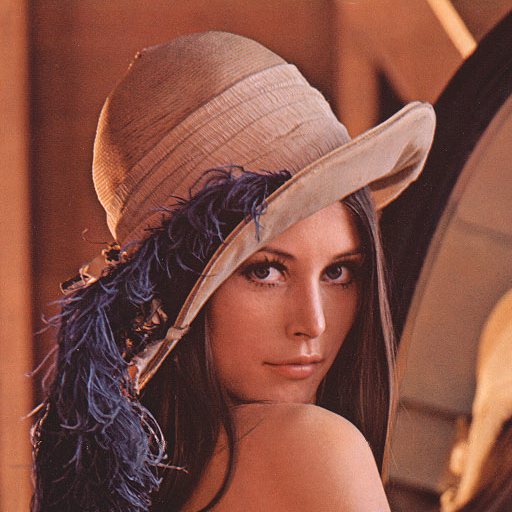

In [2]:
i = image.lena()
itorch.image(i)

In these tutorials, we'll be interested in visualizing internal states, and convolution filters:

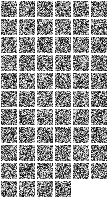

In [3]:
-- visualizing weights
n = nn.SpatialConvolution(1,64,16,16)
itorch.image(n.weight)

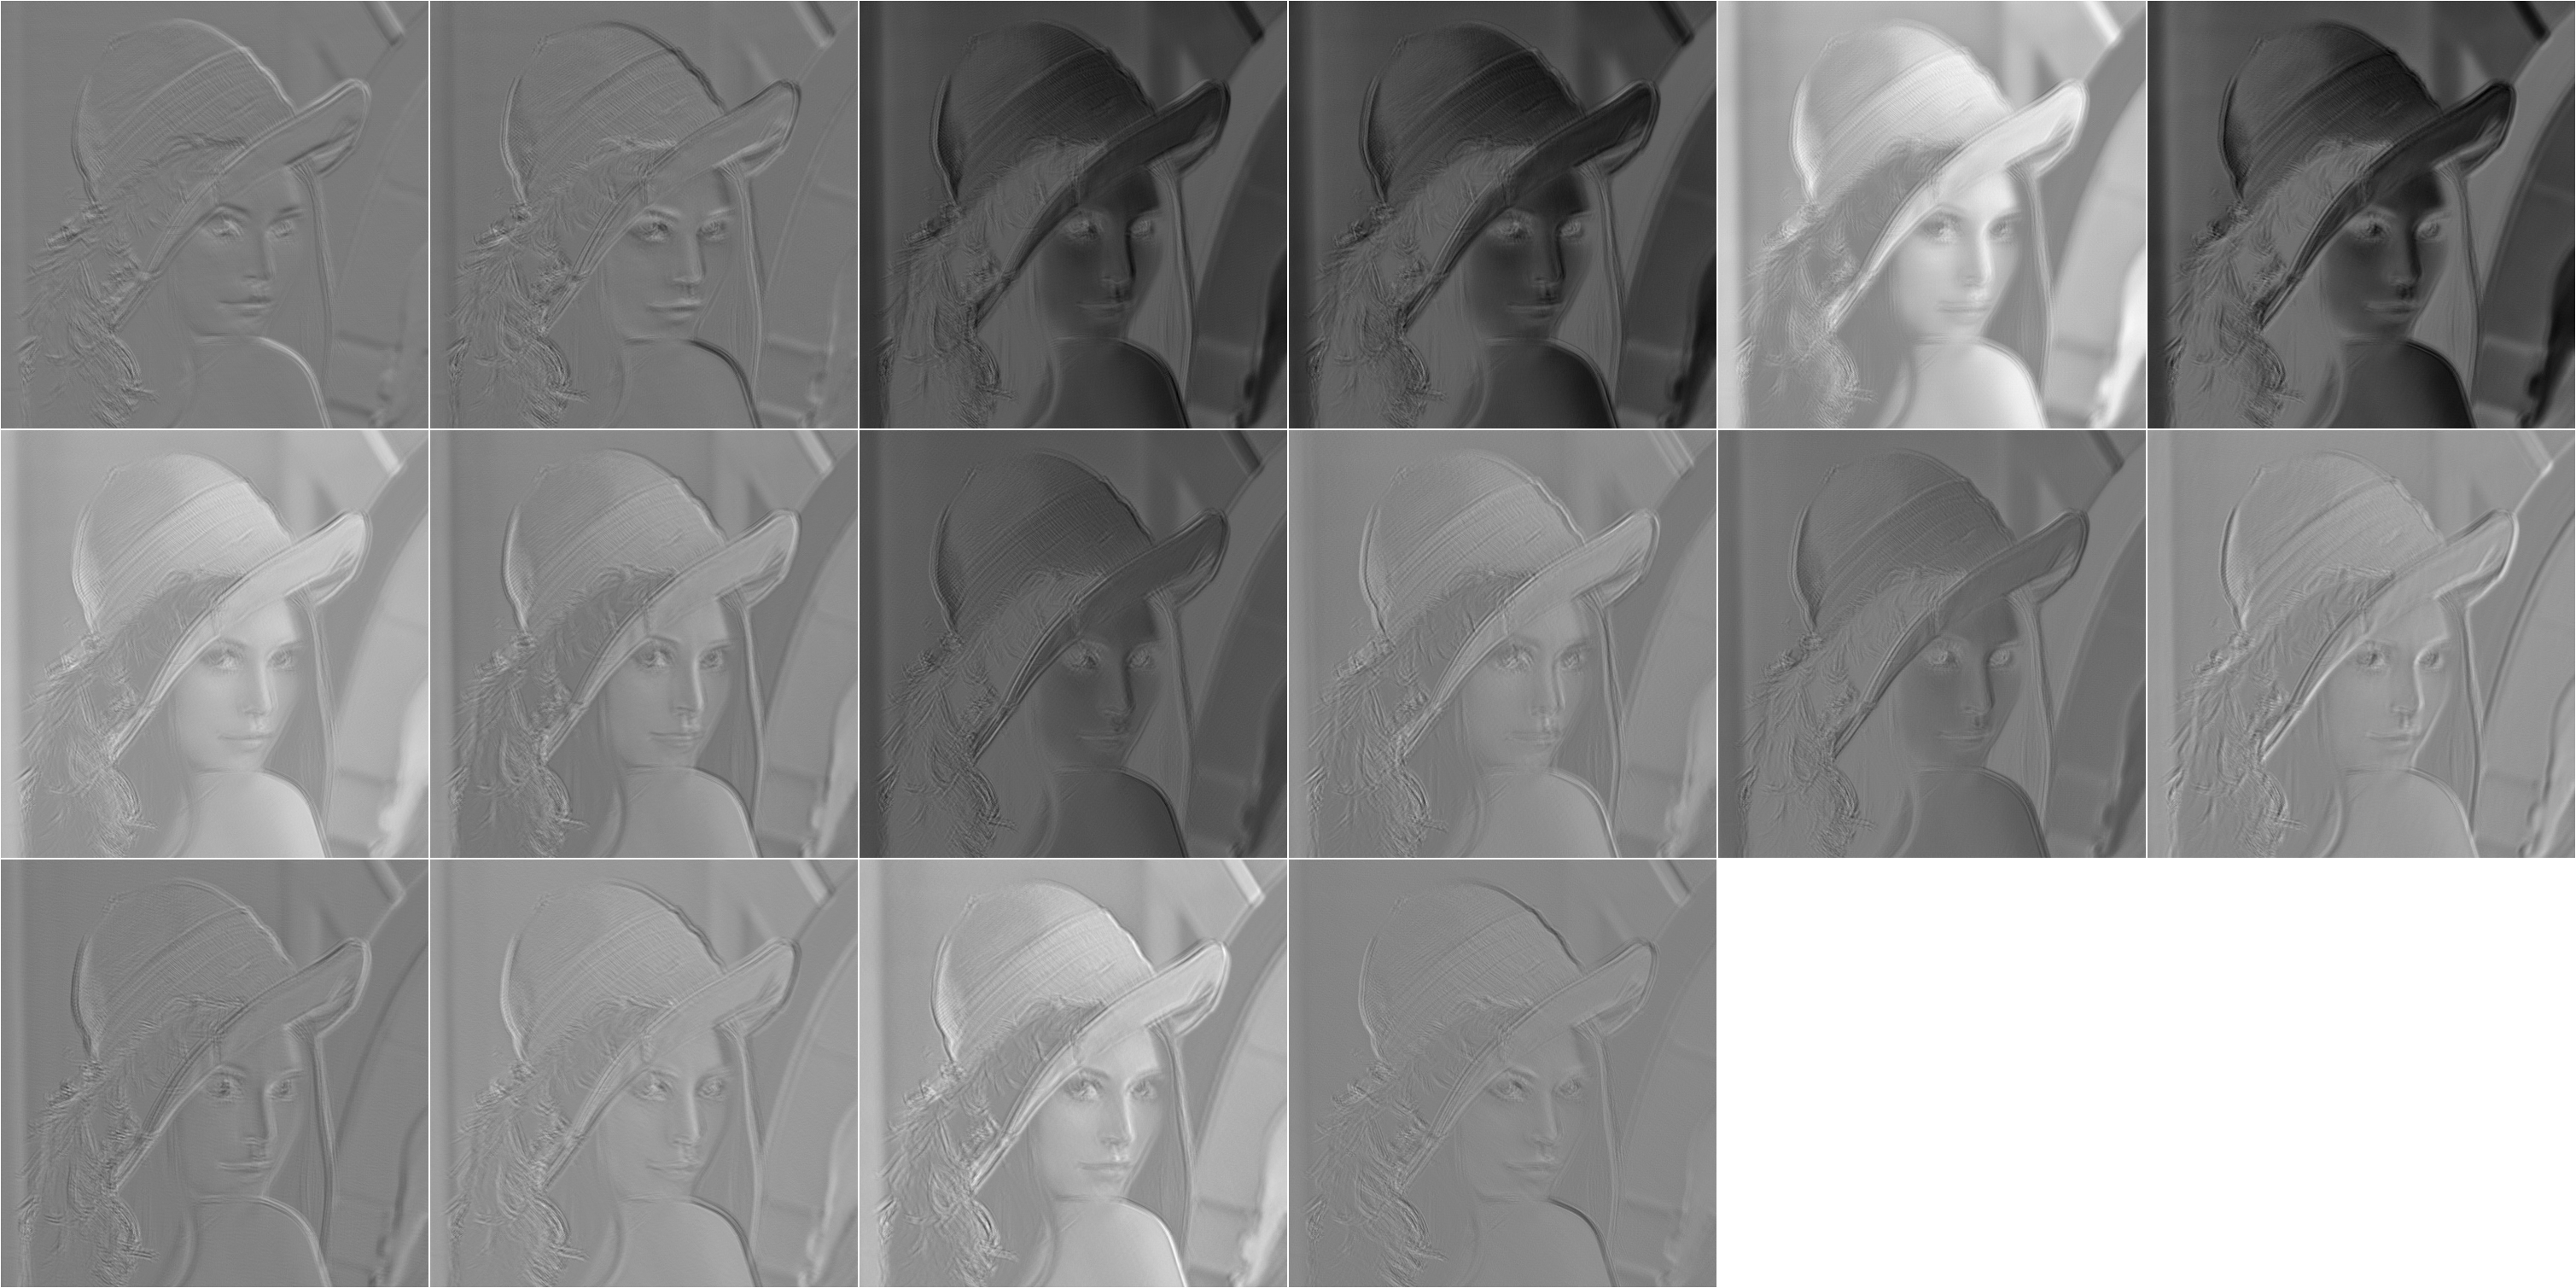

In [4]:
-- visualizing states
n = nn.SpatialConvolution(1,16,12,12)
res = n:forward(image.rgb2y(image.lena()))
-- res here is a 16x501x501 state. We view it now as 16 separate images of size 1x501x501 using the :view function
res = res:view(res:size(1), 1, res:size(2), res:size(3))
itorch.image(res)

## Getting help
The Torch documentation is community-driven and is always a work in progress. 

However, you can already get help for most functions provided in the official packages (torch/nn/gnuplot/image etc.).
Documentation is available in the git repos in each package: [torch](https://github.com/torch/torch7/blob/master/README.md), [nn](https://github.com/torch/nn/blob/master/README.md), [image](https://github.com/torch/image/blob/master/README.md) etc.

#### Auto-complete
A quick way to learn functions and explore packages is to use the TAB-completion, that is, start typing something, and then hit TAB twice:
```bash
th> torch.
Display all 175 possibilities? (y or n)
torch.abs(                  torch.floor(                torch.prod(
torch.acos(                 torch.ge(                   torch.pushudata(
torch.add(                  torch.gels(                 torch.rand(
torch.addcdiv(              torch.Generator.            torch.randn(
```

This works the same way in both the command-line REPL and itorch.

#### Inline help
For each function that is documented, you can get it's documentation in-line using the __?__ symbol prefixed before the function name.

For example:

In [5]:
?torch.randn

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
[res] torch.randn([res,] m [,n...])


 y=torch.randn(n) returns a one-dimensional tensor of size n filled 
with random numbers from a normal distribution with mean zero and variance 
one.

 y=torch.randn(m,n) returns a m x n tensor of random numbers from 
a normal distribution with mean zero and variance one.

For more than 4 dimensions, you can use a storage as argument: y=torch.rand(torch.LongStorage{m,n,k,l,o}) 
	


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	



## Going Further
#####Introduction to Lua
Now that you have all the basic pieces, we invite you to take a look at a short 10-minute tutorial on Lua over here:
__http://learnxinyminutes.com/docs/lua/__

#####What is the torch core?

The Torch core is a general numeric library, combined with several high-quality packages that are necessary for doing everyday tasks in torch.

The torch core consists of the following packages:
  * [torch](https://github.com/torch/torch7) : tensors, class factory, serialization, BLAS ;
  * [nn](https://github.com/torch/nn) : neural network Modules and Criterions;
  * [optim](https://github.com/torch/optim) : SGD, LBFGS and other optimization functions ;
  * [gnuplot](https://github.com/torch/gnuplot) : ploting and data visualization ;
  * [paths](https://github.com/torch/paths) : make directories, concatenate file paths, and other filesystem utilities ;
  * [image](https://github.com/torch/image) : save, load, crop, scale, warp, translate images and such ;
  * [trepl](https://github.com/torch/trepl) : the torch LuaJIT interpreter ;
  * [cwrap](https://github.com/torch/cwrap) : used for wrapping C/CUDA functions in Lua ;

Each package repository usually includes its own documentation via a README.md which may contain links to a docs/ directory.

In addition to the core packages, the distribution also includes 
packages that allows the more compute-intensive routines to be run 
seamlessly on __NVIDIA Graphical Processing Units (GPUs)__ using the free 
__NVIDIA CUDA__ programming language. These lightning-fast packages include :
 
  * [cutorch](https://github.com/torch/cutorch) : tensors and BLAS ;
  * [cunn](https://github.com/torch/cunn) : Modules and Criterions ;

For the most part, converting Tensors, Modules or Criterions to CUDA 
is as easy as :

In [6]:
require 'cutorch';
a = torch.randn(3,4)        -- create a torch.DoubleTensor()
b = a:cuda()                -- convert to a torch.CudaTensor()
c = torch.CudaTensor(3,4):zero()
d = torch.add(b,c)          -- d = b + c (note that this allocates memory for d)
d:add(b,c)                  -- like the previous line, but reuses existing result memory d
a:copy(d)                   -- copy torch.CudaTensor to back to CPU memory, i.e. torch.DoubleTensor

[string "require 'cutorch';..."]:1: module 'cutorch' not found:
	no field package.preload['cutorch']
	no file './cutorch.lua'
	no file '/root/torch/install/share/luajit-2.1.0-alpha/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch/init.lua'
	no file '/root/torch/install/share/lua/5.1/cutorch.lua'
	no file '/root/torch/install/share/lua/5.1/cutorch/init.lua'
	no file './cutorch.so'
	no file '/usr/local/lib/lua/5.1/cutorch.so'
	no file '/root/torch/install/lib/lua/5.1/cutorch.so'
	no file '/usr/local/lib/lua/5.1/loadall.so'
stack traceback:
	[C]: in function 'require'
	[string "require 'cutorch';..."]:1: in main chunk
	[C]: in function 'xpcall'
	/root/torch/install/share/lua/5.1/itorch/main.lua:177: in function </root/torch/install/share/lua/5.1/itorch/main.lua:143>
	/root/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/root/torch/install/share/lua/5.1/itorch/main.lua:344: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

##### Third-party and community packages
Dozens of third-party packages have grown around the core torch packages.
These are listed in the torch [Cheatsheet](https://github.com/torch/torch7/wiki/Cheatsheet).

You can install a community package usually using the ___luarocks__ package manager from the terminal. For example:
```bash
$ luarocks install penlight
```

## Forums ##

For support, users can search the Torch 
[Google Groups](https://groups.google.com/forum/embed/?place=forum%2Ftorch7#!forum/torch7) and ask questions.
The community is usually very quick to reply.